**Tarefas para k-NN**

1. Carregar o base iris usando `sklearn.datasets`
1. Separar os dados em treino e teste usando `train_test_split`
1. Treinar o k-NN e avaliar o modelo

# Carregando a base

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Dois atributos têm altíssima correlação linear com a classe.

*O que é correlação linear:*

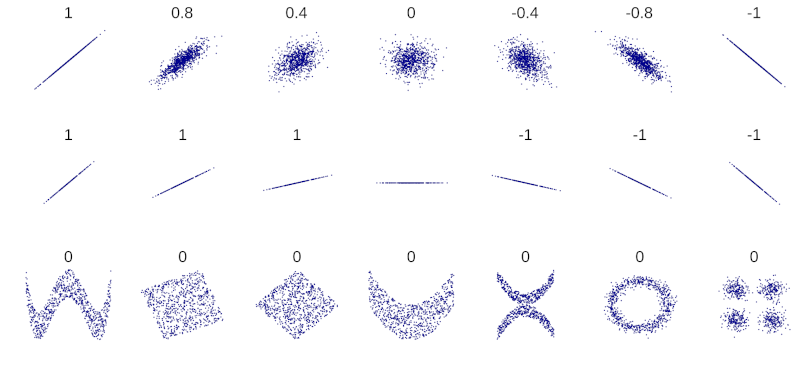

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Associando classes aos exemplos

O NumPy permite indexar um vetor por:

- índices
- fatiamento
- máscara
- vetor de índices

In [ ]:
import numpy as np

In [ ]:
gerador = np.random.RandomState(1337)
vetor = gerador.randint(1, 7, 10)
vetor

array([6, 5, 1, 2, 3, 3, 3, 5, 1, 2])

Acesso ao vetor por índice:

In [ ]:
vetor[0]

np.int64(6)

In [ ]:
vetor[-1]

np.int64(2)

Acesso por fatiamento

In [ ]:
vetor[3:6]

array([2, 3, 3])

In [ ]:
vetor[:5]

array([6, 5, 1, 2, 3])

In [ ]:
vetor[5:]

array([3, 3, 5, 1, 2])

In [ ]:
vetor[2:8:2]

array([1, 3, 3])

Acesso por máscara

In [ ]:
vetor % 2 == 0

array([ True, False, False,  True, False, False, False, False, False,
        True])

In [ ]:
vetor[vetor % 2 == 0]

array([6, 2, 2])

In [ ]:
m = vetor % 2 == 0
m

array([ True, False, False,  True, False, False, False, False, False,
        True])

In [ ]:
vetor[m]

array([6, 2, 2])

In [ ]:
~m

array([False,  True,  True, False,  True,  True,  True,  True,  True,
       False])

In [ ]:
vetor[~m]

array([5, 1, 3, 3, 3, 5, 1])

Acesso por *fancy indexing*

In [ ]:
vetor[[0, 2, 1, 3]]

array([6, 1, 5, 2])

In [ ]:
vetor[[[0, 1], [2, 3]]]

array([[6, 5],
       [1, 2]])

Usando *fancy indexing* no vetor de rótulos

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

# Separando conjuntos de treino, teste e validação

- `treino`: para encontrar os parâmetros/treinar o modelo
- `teste`: para prever o desempenho do modelo
- `validação`: para testar e ajustar hiperparâmetro

In [ ]:
from sklearn.model_selection import train_test_split

Ilustrando para aprendizado não supervisionado:

In [ ]:
matriz = np.arange(1, 11).reshape(-1, 1)
matriz

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
mtreino, mteste = train_test_split(matriz)

In [ ]:
mtreino

array([[ 6],
       [ 2],
       [10],
       [ 9],
       [ 3],
       [ 4],
       [ 8]])

In [ ]:
mteste

array([[5],
       [7],
       [1]])

## Gerando conjunto de teste

Separação da base Iris em 30% para teste.

In [ ]:
Xtreino_e_validação, Xteste, ytreino_e_validação, yteste = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

Contagem de elementos por classe. Perfeitamente balanceados no conjunto original.

In [ ]:
for classe in range(3):
  num = sum(iris.target == classe)
  pct = 100 * num / len(iris.target)
  print(f'Num. de exemplos da classe {classe} no conjunto original: {num} ({pct:.2f}%)')

Num. de exemplos da classe 0 no conjunto original: 50 (33.33%)
Num. de exemplos da classe 1 no conjunto original: 50 (33.33%)
Num. de exemplos da classe 2 no conjunto original: 50 (33.33%)


No nosso conjunto de teste...

In [ ]:
for classe in range(3):
  num = sum(yteste == classe)
  pct = 100 * num / len(yteste)
  print(f'Num. de exemplos da classe {classe} no conjunto de teste: {num} ({pct:.2f}%)')

Num. de exemplos da classe 0 no conjunto original: 19 (42.22%)
Num. de exemplos da classe 1 no conjunto original: 13 (28.89%)
Num. de exemplos da classe 2 no conjunto original: 13 (28.89%)


Separando novamente com estratificação.

In [ ]:
Xtreino_e_validação, Xteste, ytreino_e_validação, yteste = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42, stratify=iris.target
)

In [ ]:
for classe in range(3):
  num = sum(yteste == classe)
  pct = 100 * num / len(yteste)
  print(f'Num. de exemplos da classe {classe} no conjunto de teste: {num} ({pct:.2f}%)')

Num. de exemplos da classe 0 no conjunto original: 15 (33.33%)
Num. de exemplos da classe 1 no conjunto original: 15 (33.33%)
Num. de exemplos da classe 2 no conjunto original: 15 (33.33%)


## Gerando conjunto de treino e de validação

Mostrando o conjunto de treino e validação:

In [ ]:
Xtreino_e_validação.shape

(105, 4)

Separando em treino e validação

In [ ]:
Xtreino, Xval, ytreino, yval = train_test_split(
    Xtreino_e_validação, ytreino_e_validação, test_size=0.2,
    stratify=ytreino_e_validação, random_state=123
)

In [ ]:
Xtreino.shape

(84, 4)

In [ ]:
Xval.shape

(21, 4)

In [ ]:
Xteste.shape

(45, 4)

In [ ]:
for classe in range(3):
  num = sum(yval == classe)
  pct = 100 * num / len(yval)
  print(f'Num. de exemplos da classe {classe} no conjunto de validação: {num} ({pct:.2f}%)')

Num. de exemplos da classe 0 no conjunto de validação: 7 (33.33%)
Num. de exemplos da classe 1 no conjunto de validação: 7 (33.33%)
Num. de exemplos da classe 2 no conjunto de validação: 7 (33.33%)


# Treinar e valida o k-NN com diferentes valores de k

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
h1 = KNeighborsClassifier(n_neighbors=1)
h1.fit(Xtreino, ytreino);
ypred = h1.predict(Xval)
accuracy_score(yval, ypred)

0.8571428571428571

In [ ]:
for k in [1, 3, 5, 6, 8, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80]:
  h = KNeighborsClassifier(n_neighbors=k)
  h.fit(Xtreino, ytreino);
  ypred = h.predict(Xval)
  print(f'k = {k}, acc = {100*accuracy_score(yval, ypred):.2f}%')

k = 1, acc = 85.71%
k = 3, acc = 90.48%
k = 5, acc = 90.48%
k = 6, acc = 95.24%
k = 8, acc = 95.24%
k = 10, acc = 95.24%
k = 15, acc = 90.48%
k = 20, acc = 90.48%
k = 25, acc = 85.71%
k = 30, acc = 90.48%
k = 40, acc = 90.48%
k = 50, acc = 90.48%
k = 60, acc = 66.67%
k = 70, acc = 66.67%
k = 80, acc = 57.14%


# Teste final: todos os dados de treino no conjunto de teste

In [ ]:
Xtreino = Xtreino_e_validação
ytreino = ytreino_e_validação

**Treinar k=6 nesse conjunto e testar em (Xteste, yteste)**

# Naive Bayes:
- modelo paramétrico baseado no teorema de bayes
- utilizado para atributos numéricos ou categóricos
- parâmetros são probabilidades

probabilidade:
50 pretas (1, 2, 3, ... , 50)
25 vermelhas ( 1, 3, 5, ... , 49)

x representa a cor vermelha ou preta
p(X = preta) 50/75 = 67%
p(X = vermelha) 25/75 = 33%

total 75

-probabilidade conjunta: é quando há possibilidade/conjunta de dois eventos aconteçam juntas

-probabilidade condicional: probabilidade que dada uma condição que algo já está acontecendo/ou aconteceu, outra condição possa acontecer
---------------------
-Y = classe
-X = exemplo

---------------------
suavização de laplace
- utilizado para reduzir a complexidade do naive bayes, uma média

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
tennis_treino = pd.read_csv('/content/sample_data/baseDados/tennis.csv')